## Modeling
- Build baseline ML models (Logistic Regression, Random Forest, SVM)

## 01. Logistic Regression

### Create Outputs Directories

In [1]:
from pathlib import Path

# === Define base output directory ===
output_base = Path('../outputs')

# === Define subdirectories for each model ===
models = ['Logistic Regression', 'Random Forest', 'SVM']
subfolders = ['model', 'plots', 'reports']

# === Create full directory tree ===
for model in models:
    for sub in subfolders:
        path = output_base / model / sub
        path.mkdir(parents=True, exist_ok=True)

### Import and Load Processed Data

In [2]:
# Imports
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import joblib

# Load Processed Data
train_df = pd.read_csv('../datasets/processed_train.csv')
test_df = pd.read_csv('../datasets/processed_test.csv')

# Split Data on Two inputs & output
x_train = train_df.drop('target', axis=1)
y_train = train_df['target']

x_test = test_df.drop('target', axis=1)
y_test = test_df['target']

### Train Logistic Regression Model

In [3]:
# Initialize Model
logreg = LogisticRegression(random_state=42, max_iter=1000)

# Train Model
logreg.fit(x_train, y_train)

# Save the trained model
joblib.dump(logreg, '../outputs/Logistic Regression/model/logreg_model.pkl')

['../outputs/Logistic Regression/model/logreg_model.pkl']

### Evaluate Test Data

In [4]:
y_pred_logreg = logreg.predict(x_test)
y_prop_logreg = logreg.predict_proba(x_test)[:, 1]

### Confusion Matrix + Curves

              precision    recall  f1-score   support

      Benign       0.93      0.98      0.95        42
   Malignant       0.99      0.96      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



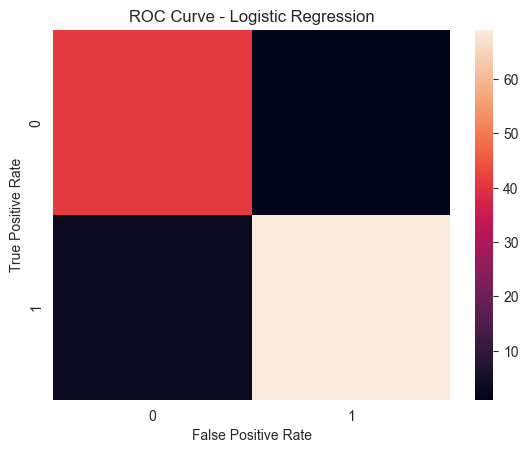

In [5]:
print(classification_report(y_test, y_pred_logreg, target_names=['Benign', 'Malignant']))
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm_logreg)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.savefig('../outputs/Logistic Regression/plots/confusion matrix.png', bbox_inches='tight')
plt.show()


### ROC Curve

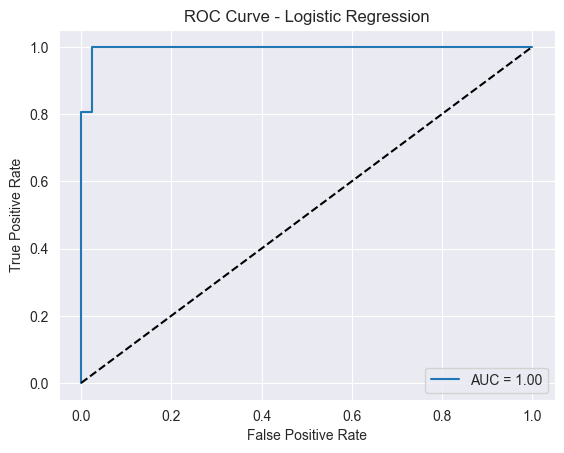

In [6]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prop_logreg)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prop_logreg):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.savefig('../outputs/Logistic Regression/plots/roc curve.png', bbox_inches='tight')
plt.show()


### Precision Recall Curve

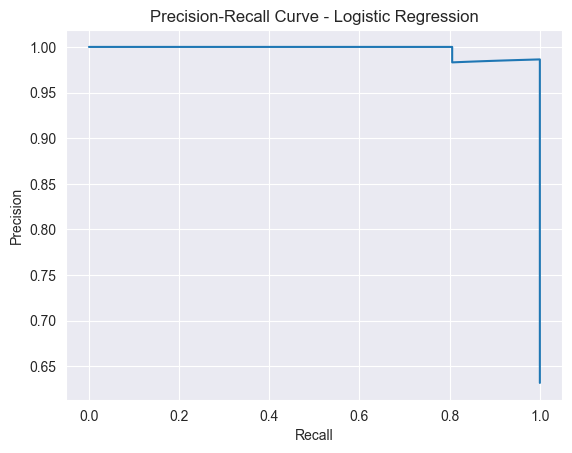

In [7]:
# Precision-Recall Curve
prec, rec, _ = precision_recall_curve(y_test, y_prop_logreg)
plt.plot(rec, prec)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Logistic Regression")
plt.savefig('../outputs/Logistic Regression/plots/precision recall curve.png', bbox_inches='tight')
plt.show()

### Logistic Regression Evaluation

- Precision and recall show model's robustness for detecting malignant tumors.
- AUC-ROC gives us overall classification power.
- Precision-Recall Curve focuses on performance with imbalanced classes.
